## Underestand The Dataset

In [ ]:
import pandas as pd

In [19]:
df = pd.read_csv('../data/sales_data_sample.csv', encoding='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [24]:
df.shape


(2823, 25)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [26]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [33]:
df.columns[df.isnull().sum() > 0]

Index(['ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY'], dtype='object')

From the above i noticed that 4 columns (AddressLine2,STATE, POSTALCODE, TERRITORY) have null values

In [36]:
df.duplicated().sum()

np.int64(0)

No duplicated rows

In [37]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [38]:
df['SALES'].describe

<bound method NDFrame.describe of 0       2871.00
1       2765.90
2       3884.34
3       3746.70
4       5205.27
         ...   
2818    2244.40
2819    3978.51
2820    5417.57
2821    2116.16
2822    3079.44
Name: SALES, Length: 2823, dtype: float64>

## Step 2: Cleaning and Preparation of Data

In [39]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [40]:
df = df.rename(columns={'ORDERNUMBER':'TransactionID',
                        'SALES':'Revenue',
                        'ORDERDATE':'Date',
                        'PRODUCTCODE':'ProductID',
                        'QUANTITYORDERED':'UnitSold'

})

In [41]:
df.columns

Index(['TransactionID', 'UnitSold', 'PRICEEACH', 'ORDERLINENUMBER', 'Revenue',
       'Date', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
       'MSRP', 'ProductID', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1',
       'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [42]:
df = df.rename(columns={'PRICEEACH':'UnitPrice',
                        

})

In [ ]:

df['Date'] = pd.to_datetime(df['Date'])

In [48]:
df['Date'].head()

0   2003-02-24
1   2003-05-07
2   2003-07-01
3   2003-08-25
4   2003-10-10
Name: Date, dtype: datetime64[ns]

Now i want to determine transactions that happened within our campaign period let us first assess when was the earliest transaction and latest so we dont suffer of bounds

In [50]:
df['Date'].describe()

count                             2823
mean     2004-05-11 00:16:49.989373056
min                2003-01-06 00:00:00
25%                2003-11-06 12:00:00
50%                2004-06-15 00:00:00
75%                2004-11-17 12:00:00
max                2005-05-31 00:00:00
Name: Date, dtype: object

We notice the earliest date is '2003-01-06' and latest '2005-05-31'
Lets say campaign_start is '2003-07-01'to '2003-07-15'

In [51]:
campaign_start = pd.to_datetime('2003-07-01')
campaign_end = pd.to_datetime('2003-07-15')

In [52]:
def label_period(date):
    if date < campaign_start:
        return "Before"
    elif campaign_start <= date <= campaign_end:
        return "During"
    else:
        return "After"
    
df['CampaignPeriod'] = df['Date'].apply(label_period)

In [53]:
df.head(5)

,TransactionID,UnitSold,UnitPrice,ORDERLINENUMBER,Revenue,Date,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,CampaignPeriod
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,Before
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,Before
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,During
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,After
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,After


In [58]:
df[df['CampaignPeriod'] == "During"].shape[0]

31

In [59]:
df['CampaignPeriod'].value_counts()

CampaignPeriod
After     2500
Before     292
During      31
Name: count, dtype: int64

## Step 3: Revenue Comparison

In [60]:
revenue_per_period = df.groupby('CampaignPeriod')['Revenue'].sum()
print(revenue_per_period)

CampaignPeriod
After     8907866.15
Before    1007459.91
During     117302.79
Name: Revenue, dtype: float64


In [61]:
df.groupby('CampaignPeriod').agg({
    'Revenue':'sum',
    'TransactionID': 'count'
})

,Revenue,TransactionID
CampaignPeriod,,
After,8907866.15,2500
Before,1007459.91,292
During,117302.79,31


Lets now calculate the percentage difference per period

In [69]:
def percentage_diff(old, new):
    percentage = ((new - old) / old ) * 100
    return percentage

before = revenue_per_period['Before']
during = revenue_per_period['During']
after = revenue_per_period['After']


percentage_change_during = percentage_diff(before,during)
percentage_change_after = percentage_diff(during,after)

print(f'Percentage Revenue Change During the campaign : {round(percentage_change_during,2)} %')
print(f'Percentage Revenue Change After the campaign : {round(percentage_change_after,2)} %')
print(campaign_start,campaign_end)


Percentage Revenue Change During the campaign : -88.36 %
Percentage Revenue Change After the campaign : 7493.91 %
2003-07-01 00:00:00 2003-07-15 00:00:00


In [77]:
def label_period_2(date):
    if pd.to_datetime('2003-06-16') <= date < campaign_start:
        return "PreCampaign"
    elif campaign_end < date <= pd.to_datetime('2003-07-30'):
        return "PostCampaign"
    elif date < pd.to_datetime('2003-06-16'):
        return "Before"
    elif date > pd.to_datetime('2003-07-30'):
        return "After"
    else:
        return "During"
    
df['CampaignPeriod'] = df['Date'].apply(label_period_2)

In [78]:
df['CampaignPeriod'].value_counts()

CampaignPeriod
After           2481
Before           274
During            31
PostCampaign      19
PreCampaign       18
Name: count, dtype: int64

In [79]:
revenue_per_period = df.groupby('CampaignPeriod')['Revenue'].sum()
print(revenue_per_period)

CampaignPeriod
After           8837437.06
Before           957663.87
During           117302.79
PostCampaign      70429.09
PreCampaign       49796.04
Name: Revenue, dtype: float64


In [81]:
preCampaign = revenue_per_period['PreCampaign']
postCampaign = revenue_per_period['PostCampaign']
during = revenue_per_period['During']

print(preCampaign, postCampaign)

49796.04 70429.09


In [87]:
postCampaign_percentage_change = percentage_diff(during, postCampaign)
campaign_percentage_change = percentage_diff(preCampaign, during)

print(f'Percentage Revenue Change During the campaign : {round(campaign_percentage_change,2)} %')
print(f'Percentage Revenue Change After the campaign : {round(postCampaign_percentage_change,2)} %')

Percentage Revenue Change During the campaign : 135.57 %
Percentage Revenue Change After the campaign : -39.96 %


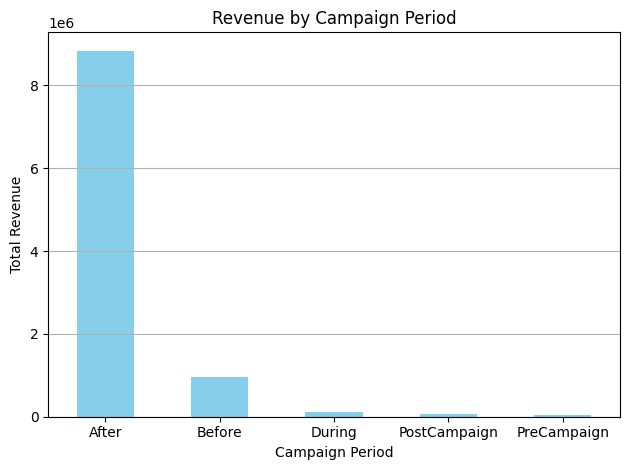

In [88]:
import matplotlib.pyplot as plt

revenue_per_period.plot(kind='bar', color='skyblue', title='Revenue by Campaign Period')
plt.ylabel('Total Revenue')
plt.xlabel('Campaign Period')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [91]:
df.columns

Index(['TransactionID', 'UnitSold', 'UnitPrice', 'ORDERLINENUMBER', 'Revenue',
       'Date', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
       'MSRP', 'ProductID', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1',
       'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE', 'CampaignPeriod'],
      dtype='object')

In [93]:
df = df.rename(columns={'COUNTRY': 'Store'})

In [94]:
df.columns

Index(['TransactionID', 'UnitSold', 'UnitPrice', 'ORDERLINENUMBER', 'Revenue',
       'Date', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
       'MSRP', 'ProductID', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1',
       'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'Store', 'TERRITORY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE', 'CampaignPeriod'],
      dtype='object')

In [96]:
df['Store'].head()

0       USA
1    France
2    France
3       USA
4       USA
Name: Store, dtype: object

In [97]:
df['Store'].value_counts()

Store
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: count, dtype: int64

In [103]:
store_revenue = df.groupby(['Store','CampaignPeriod'])['Revenue'].sum().unstack()
store_revenue


CampaignPeriod,After,Before,During,PostCampaign,PreCampaign
Store,,,,,
Australia,542090.00,60135.84,NaN,28397.26,NaN
Austria,163433.39,38629.14,NaN,NaN,NaN
Belgium,106701.36,1711.26,NaN,NaN,NaN
Canada,224078.56,NaN,NaN,NaN,NaN
Denmark,186766.04,58871.11,NaN,NaN,NaN
Finland,329581.91,NaN,NaN,NaN,NaN
France,926662.73,126231.51,58022.28,NaN,NaN
Germany,209039.75,11432.34,NaN,NaN,NaN
Ireland,57756.43,NaN,NaN,NaN,NaN


In [106]:
store_revenue = store_revenue.fillna(0)
store_revenue

CampaignPeriod,After,Before,During,PostCampaign,PreCampaign
Store,,,,,
Australia,542090.00,60135.84,0.00,28397.26,0.00
Austria,163433.39,38629.14,0.00,0.00,0.00
Belgium,106701.36,1711.26,0.00,0.00,0.00
Canada,224078.56,0.00,0.00,0.00,0.00
Denmark,186766.04,58871.11,0.00,0.00,0.00
Finland,329581.91,0.00,0.00,0.00,0.00
France,926662.73,126231.51,58022.28,0.00,0.00
Germany,209039.75,11432.34,0.00,0.00,0.00
Ireland,57756.43,0.00,0.00,0.00,0.00
